In [1]:
import pandas as pd
import matplotlib.pyplot as plt
ssn = pd.read_csv('sous_nutrition.csv')
pop = pd.read_csv('population.csv')
dis = pd.read_csv('dispo_alimentaire.csv')
aid = pd.read_csv('aide_alimentaire.csv')

## Demande Marc 1 - Proportion des personnes en état de sous-nutrition en 2017

>>### Renommage des colonnes de même nom:

In [2]:
ssn = ssn.rename(columns={'Valeur':'Valeur_ssn'})
pop = pop.rename(columns={'Valeur':'Valeur_pop'})
aid = aid.rename(columns={'Valeur':'Valeur_aid'})

>>### Cast 'Valeur_ssn':

In [3]:
ssn['Valeur_ssn'] = pd.to_numeric(ssn['Valeur_ssn'], errors='coerce')

>>###    Valeurs manquantes:

In [4]:
ssn['Valeur_ssn'] = ssn['Valeur_ssn'].fillna(0)

In [5]:
ssn.loc[ssn['Valeur_ssn'].isnull()]

,Zone,Année,Valeur_ssn


>>###    Données à modifier:

In [6]:
ssn['Année'] = ssn['Année'].replace(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019']
                                    ,[2013, 2014, 2015, 2016, 2017, 2018])

In [7]:
pop['Valeur_pop'] = pop['Valeur_pop']/1000

>>### Sélection des lignes 2017:

In [8]:
ssn2017 = ssn.loc[ssn['Année']==2017, ['Zone','Valeur_ssn']]

In [9]:
pop2017 = pop.loc[pop['Année']==2017, ['Zone', 'Valeur_pop']]

>>### Jointure:

In [10]:
ssn_pop_2017 = pd.merge(ssn2017, pop2017, how='outer')
ssn_pop_2017

,Zone,Valeur_ssn,Valeur_pop
0,Afghanistan,10.5,36.296113
1,Afrique du Sud,3.1,57.009756
2,Albanie,0.1,2.884169
3,Algérie,1.3,41.389189
4,Allemagne,0.0,82.658409
...,...,...,...
231,Saint-Marin,NaN,0.033671
232,Saint-Martin (partie française),NaN,0.036560
233,Saint-Pierre-et-Miquelon,NaN,0.005887
234,Saint-Siège,NaN,0.000793


>>### Nettoyage des données:

In [11]:
ssn_pop_2017['Valeur_ssn'] = ssn_pop_2017['Valeur_ssn'].fillna(0)

>>### Calcul:

In [12]:
calcul_ss_nutr = ssn_pop_2017['Valeur_ssn'].sum()/ssn_pop_2017['Valeur_pop'].sum()*100
print('La proportion de personnes en état de sous-nutrition est de {:.2f} %'.format(calcul_ss_nutr))

La proportion de personnes en état de sous-nutrition est de 7.10 %


## Demande Marc 2 - Nombre théorique de personnes qui pourraient être nourries

In [13]:
dis['Disponibilité alimentaire (Kcal/personne/jour)'] = dis['Disponibilité alimentaire (Kcal/personne/jour)'].fillna(0)

In [14]:
dispo_par_pays = pd.DataFrame(dis.groupby('Zone') ['Disponibilité alimentaire (Kcal/personne/jour)'].sum())
dispo_par_pays

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [15]:
dis_pop = pd.merge(dispo_par_pays, pop2017, on='Zone')
dis_pop

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur_pop
0,Afghanistan,2087.0,36.296113
1,Afrique du Sud,3020.0,57.009756
2,Albanie,3188.0,2.884169
3,Algérie,3293.0,41.389189
4,Allemagne,3503.0,82.658409
...,...,...,...
167,Émirats arabes unis,3275.0,9.487203
168,Équateur,2346.0,16.785361
169,États-Unis d'Amérique,3682.0,325.084756
170,Éthiopie,2129.0,106.399924


In [16]:
dis_pop['Dispo alimentaire totale (Kcal./jour)'] = dis_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * dis_pop['Valeur_pop']

In [17]:
for kcal in [1800, 2500, 2700]:
    on_peut_nour = dis_pop['Dispo alimentaire totale (Kcal./jour)'].sum()/kcal/1000
    print('Dans le cas de {} calories/jour, on peut nourrir: {:.2f} milliards de personnes'.format(kcal, on_peut_nour))

Dans le cas de 1800 calories/jour, on peut nourrir: 11.62 milliards de personnes
Dans le cas de 2500 calories/jour, on peut nourrir: 8.37 milliards de personnes
Dans le cas de 2700 calories/jour, on peut nourrir: 7.75 milliards de personnes


## Demande Marc 3 - Nombre théorique de personnes qui pourraient être nourries avec une nourriture végétale

In [18]:
dispo_vegetale = dis[dis['Origine']=='vegetale']

In [19]:
dispo_vegetale_par_pays = pd.DataFrame(dispo_vegetale.groupby('Zone') ['Disponibilité alimentaire (Kcal/personne/jour)'].sum())

In [20]:
dis_vegetale_pop = pd.merge(dispo_vegetale_par_pays, pop2017, on='Zone')
dis_vegetale_pop

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur_pop
0,Afghanistan,1871.0,36.296113
1,Afrique du Sud,2533.0,57.009756
2,Albanie,2203.0,2.884169
3,Algérie,2915.0,41.389189
4,Allemagne,2461.0,82.658409
...,...,...,...
167,Émirats arabes unis,2718.0,9.487203
168,Équateur,1732.0,16.785361
169,États-Unis d'Amérique,2698.0,325.084756
170,Éthiopie,2005.0,106.399924


In [21]:
dis_vegetale_pop['Dispo alimentaire végétale totale (Kcal./jour)'] = dis_vegetale_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * dis_vegetale_pop['Valeur_pop']

In [22]:
for kcal in [1800, 2500, 2700]:
    on_peut_nourrir_veg = dis_vegetale_pop['Dispo alimentaire végétale totale (Kcal./jour)'].sum()/kcal/1000
    print('Dans le cas de {} calories/jour, on peut nourrir: {:.2f} milliards de personnes'.format(kcal, on_peut_nourrir_veg))

Dans le cas de 1800 calories/jour, on peut nourrir: 9.59 milliards de personnes
Dans le cas de 2500 calories/jour, on peut nourrir: 6.90 milliards de personnes
Dans le cas de 2700 calories/jour, on peut nourrir: 6.39 milliards de personnes


## Demande Marc 4 - Utilisation de la disponibilité intérieure: part attribuée à l'alimentation animale

In [23]:
part_alim_animaux = (dis['Aliments pour animaux'].sum()) / (dis['Disponibilité intérieure'].sum())*100
print('La part attribuée à l\'alimentation animale est de: {:.2f} % '.format(part_alim_animaux))

La part attribuée à l'alimentation animale est de: 13.24 % 


## Demande Marc 5 - Utilisation de la disponibilité intérieure: part perdue

In [24]:
part_perdue = (dis['Pertes'].sum()) / (dis['Disponibilité intérieure'].sum())*100
print('La part perdue est de: {:.2f} %'.format(part_perdue))

La part perdue est de: 4.61 %


## Demande Marc 6 - Utilisation de la disponibilité intérieure: part utilisée pour l'alimentation humaine

In [25]:
part_alim_humaine = (dis['Nourriture'].sum()) / (dis['Disponibilité intérieure'].sum())*100
print('La part attribuée à l\'alimentation humaine est de: {:.2f} %'.format(part_alim_humaine))

La part attribuée à l'alimentation humaine est de: 49.51 %


In [26]:
part_autres = 100-(part_alim_humaine + part_perdue + part_alim_animaux)

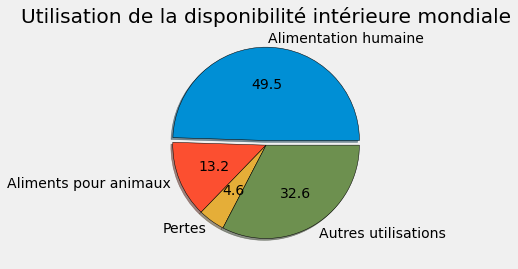

In [27]:
plt.style.use("fivethirtyeight")
plt.title('Utilisation de la disponibilité intérieure mondiale')
slices = [part_alim_humaine, part_alim_animaux, part_perdue, part_autres]
labels = ['Alimentation humaine', 'Aliments pour animaux', 'Pertes', 'Autres utilisations']
explode = [0.05,0,0, 0]
plt.pie(slices, labels = labels, autopct='%.1f', wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True)
plt.show()

## Demande Mélanie 1 - Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [28]:
ssn_pop_2017

,Zone,Valeur_ssn,Valeur_pop
0,Afghanistan,10.5,36.296113
1,Afrique du Sud,3.1,57.009756
2,Albanie,0.1,2.884169
3,Algérie,1.3,41.389189
4,Allemagne,0.0,82.658409
...,...,...,...
231,Saint-Marin,0.0,0.033671
232,Saint-Martin (partie française),0.0,0.036560
233,Saint-Pierre-et-Miquelon,0.0,0.005887
234,Saint-Siège,0.0,0.000793


In [29]:
ssn_pop_2017['Proportion de personnes sous-alimentées (%)'] = round(ssn_pop_2017['Valeur_ssn']/ssn_pop_2017['Valeur_pop']*100, 2)

In [30]:
plus_ss_alim = pd.DataFrame(ssn_pop_2017.sort_values(by='Proportion de personnes sous-alimentées (%)', ascending=False).iloc[:20])
plus_ss_alim[['Zone','Proportion de personnes sous-alimentées (%)']]

,Zone,Proportion de personnes sous-alimentées (%)
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
183,Tchad,37.96
161,Rwanda,35.06
121,Mozambique,32.81
186,Timor-Leste,32.17
0,Afghanistan,28.93


In [31]:
plus_ss_alim1 = plus_ss_alim.sort_values(by='Proportion de personnes sous-alimentées (%)')

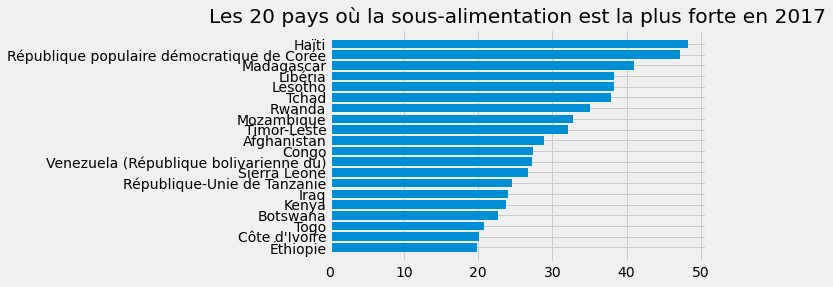

In [32]:
plt.style.use("fivethirtyeight")
plt.title('Les 20 pays où la sous-alimentation est la plus forte en 2017')
plt.barh(plus_ss_alim1['Zone'], plus_ss_alim1['Proportion de personnes sous-alimentées (%)'])
plt.show()

## Demande Mélanie 2 - Pays qui ont le plus bénéficié d’aide depuis 2013

In [33]:
aid['Année'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

In [34]:
cumul_aides_depuis_2013 = pd.DataFrame(aid.groupby('Pays bénéficiaire') ['Valeur_aid'].sum())

In [35]:
cumul_aides_depuis_2013 = cumul_aides_depuis_2013.rename(columns={'Valeur_aid': 'Aide cumulée 2013-2016 (milliers de tonnes)'})

In [36]:
cumul_aides_depuis_2013['Aide cumulée 2013-2016 (milliers de tonnes)'] = cumul_aides_depuis_2013['Aide cumulée 2013-2016 (milliers de tonnes)']/1000

In [37]:
cumul_aides_depuis_2013.sort_values(by=['Aide cumulée 2013-2016 (milliers de tonnes)'], ascending=False).iloc[:10]

,Aide cumulée 2013-2016 (milliers de tonnes)
Pays bénéficiaire,
République arabe syrienne,1858.943
Éthiopie,1381.294
Yémen,1206.484
Soudan du Sud,695.248
Soudan,669.784
Kenya,552.836
Bangladesh,348.188
Somalie,292.678
République démocratique du Congo,288.502


## Demande Mélanie 3 - Pays qui ont la plus grande disponibilité alimentaire par habitant

In [38]:
dispo_par_pays.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=False).iloc[:10]

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


# Demande 4 - Pays qui ont la plus faible disponibilité alimentaire par habitant

In [39]:
dispo_par_pays.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)']).iloc[:10]

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


# Demandes annexes

>>### 1. Répartition de l'utilisation des céréales:

In [40]:
fichier_cereales = pd.read_csv('FAOSTAT_data_1-26-2022.csv')

In [41]:
fichier_cereales['Produit'].unique()

array(['Bl? et produits', 'Riz (Eq Blanchi)', 'Orge et produits',
       'Ma?s et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'C?r?ales, Autres'],
      dtype=object)

In [42]:
cereales = ['Blé', 'Seigle', 'Orge', 'Avoine', 'Maïs', 'Millet', 'Riz (Eq Blanchi)', 'Sorgho', 'Céréales, Autres']
is_cereal = dis.loc[dis['Produit'].isin(cereales), ['Produit', 'Disponibilité intérieure', 'Nourriture', 'Aliments pour animaux', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations']]

In [43]:
resultats_cereales = []
print('Répartition de l\'utilisation de la disponibilité en céréales:')
utilisations = ['Nourriture', 'Aliments pour animaux', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations']
for col in utilisations:
    tx_utilisation  = (is_cereal[col].sum()) / (is_cereal['Disponibilité intérieure'].sum())*100
    print('{} : {:.2f} %'.format(col, tx_utilisation))
    resultats_cereales.append(tx_utilisation)

Répartition de l'utilisation de la disponibilité en céréales:
Nourriture : 42.75 %
Aliments pour animaux : 36.29 %
Pertes : 4.45 %
Semences : 2.85 %
Traitement : 3.93 %
Autres Utilisations : 9.75 %


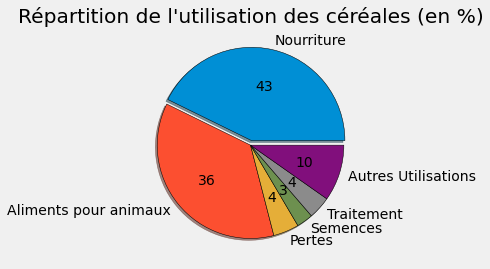

In [44]:
plt.style.use("fivethirtyeight")
plt.title('Répartition de l\'utilisation des céréales (en %)')
explode = [0.05,0,0,0,0,0]
plt.pie(resultats_cereales, labels = utilisations, autopct='%.0f', wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True)
plt.savefig('cereales.png')
plt.show()

>>### 2. Utilisation du manioc en Thaïlande:

In [45]:
ssn_pop_2017.loc[ssn_pop_2017['Zone'] == 'Thaïlande',['Zone', 'Proportion de personnes sous-alimentées (%)']]

,Zone,Proportion de personnes sous-alimentées (%)
185,Thaïlande,8.96


In [46]:
ssn_pop_2017

,Zone,Valeur_ssn,Valeur_pop,Proportion de personnes sous-alimentées (%)
0,Afghanistan,10.5,36.296113,28.93
1,Afrique du Sud,3.1,57.009756,5.44
2,Albanie,0.1,2.884169,3.47
3,Algérie,1.3,41.389189,3.14
4,Allemagne,0.0,82.658409,0.00
...,...,...,...,...
231,Saint-Marin,0.0,0.033671,0.00
232,Saint-Martin (partie française),0.0,0.036560,0.00
233,Saint-Pierre-et-Miquelon,0.0,0.005887,0.00
234,Saint-Siège,0.0,0.000793,0.00


In [47]:
utilisation_manioc_th = dis.loc[(dis['Zone']=='Thaïlande') & (dis['Produit'] == 'Manioc'), ['Production', 'Importations - Quantité', 'Exportations - Quantité', 'Disponibilité intérieure', 'Nourriture', 'Aliments pour animaux', 'Pertes']]

In [48]:
print('Utilisation du manioc disponible en Thaïlande:')
utilisation_manioc_th

Utilisation du manioc disponible en Thaïlande:


,Production,Importations - Quantité,Exportations - Quantité,Disponibilité intérieure,Nourriture,Aliments pour animaux,Pertes
13809,30228.0,1250.0,25214.0,6264.0,871.0,1800.0,1511.0


In [49]:
exp_prod_manioc = utilisation_manioc_th['Exportations - Quantité'].sum()/utilisation_manioc_th['Production'].sum()*100
print('Part du manioc produit en Thaïlande qui est exportée: {:.1f} %'.format(exp_prod_manioc))

Part du manioc produit en Thaïlande qui est exportée: 83.4 %


>>### 3. Infos utiles:

>>>#### analyse pertes / disponibilté intérieure:

In [50]:
analyse_pertes = pd.DataFrame(dis.groupby('Zone') ['Pertes'].sum())
analyse_pertes['Disponibilité intérieure']= dis.groupby('Zone') ['Disponibilité intérieure'].sum()

In [51]:
analyse_pertes['Taux pertes']= round(analyse_pertes['Pertes']/analyse_pertes['Disponibilité intérieure']*100, 2)

In [52]:
analyse_pertes_pays_ss_alim = pd.merge(analyse_pertes, plus_ss_alim, on='Zone', how='right')

In [53]:
analyse_pertes_pays_ss_alim = analyse_pertes_pays_ss_alim.sort_values('Taux pertes', ascending=False)
analyse_pertes_pays_ss_alim[['Zone', 'Taux pertes']]

,Zone,Taux pertes
12,Sierra Leone,33.35
17,Togo,11.62
0,Haïti,11.00
10,Congo,9.66
5,Tchad,8.65
18,Côte d'Ivoire,8.51
13,République-Unie de Tanzanie,8.48
9,Afghanistan,8.40
1,République populaire démocratique de Corée,7.17
14,Iraq,7.04


>>>#### analyse exportations / production:

In [54]:
analyse_export = pd.DataFrame(dis.groupby('Zone') ['Exportations - Quantité'].sum())
analyse_export['Production']= dis.groupby('Zone') ['Production'].sum()

In [55]:
analyse_export['Taux d\'exportations']= round(analyse_export['Exportations - Quantité']/analyse_export['Production']*100, 2)

In [56]:
analyse_export_pays_ss_alim = pd.merge(analyse_export, plus_ss_alim, on='Zone', how='right')

In [57]:
analyse_export_pays_ss_alim = analyse_export_pays_ss_alim.sort_values('Taux d\'exportations', ascending=False)
analyse_export_pays_ss_alim[['Zone', 'Taux d\'exportations']]

,Zone,Taux d'exportations
16,Botswana,13.55
18,Côte d'Ivoire,12.79
4,Lesotho,7.66
17,Togo,6.76
8,Timor-Leste,6.20
15,Kenya,4.54
13,République-Unie de Tanzanie,3.26
6,Rwanda,2.56
9,Afghanistan,2.49
3,Libéria,2.22


>>>#### analyse alimentation humaine / production:

In [58]:
analyse_nourr = pd.DataFrame(dis.groupby('Zone') ['Production'].sum())
analyse_nourr['Nourriture']= dis.groupby('Zone') ['Nourriture'].sum()

In [59]:
analyse_nourr['Rapport alimentation humaine/production (%)']= round(analyse_nourr['Nourriture']/analyse_nourr['Production']*100, 2)

In [60]:
analyse_nourr_pays_ss_alim = pd.merge(analyse_nourr, plus_ss_alim, on='Zone', how='right')

In [61]:
analyse_nourr_pays_ss_alim = analyse_nourr_pays_ss_alim.sort_values('Rapport alimentation humaine/production (%)')
analyse_nourr_pays_ss_alim[['Zone', 'Rapport alimentation humaine/production (%)']]

,Zone,Rapport alimentation humaine/production (%)
12,Sierra Leone,46.88
7,Mozambique,60.45
18,Côte d'Ivoire,66.25
13,République-Unie de Tanzanie,67.28
2,Madagascar,68.79
6,Rwanda,71.60
19,Éthiopie,72.36
5,Tchad,79.51
0,Haïti,80.86
15,Kenya,81.86


>>>#### analyse aide reçue / population:

In [62]:
analyse_aide_pop = pd.merge (cumul_aides_depuis_2013, plus_ss_alim, left_on='Pays bénéficiaire', right_on='Zone')

In [63]:
analyse_aide_pop['Aide reçue (kg/an/habitant)']= (analyse_aide_pop['Aide cumulée 2013-2016 (milliers de tonnes)']*10**9) / (analyse_aide_pop['Valeur_pop']*10**9) / 4

In [64]:
analyse_aide_pop = analyse_aide_pop.sort_values('Aide reçue (kg/an/habitant)')
analyse_aide_pop[['Zone', 'Aide reçue (kg/an/habitant)']]

,Zone,Aide reçue (kg/an/habitant)
15,Timor-Leste,0.023326
4,Iraq,0.023953
10,Rwanda,0.238044
9,Mozambique,0.511466
2,Côte d'Ivoire,0.551796
12,République-Unie de Tanzanie,0.786777
16,Togo,0.805484
13,Sierra Leone,0.866070
8,Madagascar,0.945210
7,Libéria,1.055139
